In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_L=pd.read_csv("L.csv")
data_i=pd.read_csv("i.csv")

In [4]:
I=np.array(data_i.iloc[:,1:])
L=np.array(data_L.iloc[:,1:])

In [5]:
def cVector(δ,ε):
    return δ/ε

In [6]:
def xVector(θ,η):
    return np.add(θ,η)

In [7]:
def corollary_55(n,s,c,q):
    result=0
    for i in range(n):
        result=result+(s**2*c**2)/(1-q**2)
    return (2/n**2)*result

In [8]:
h=0.05
s=1
δ=1
q=0
#ε

In [9]:
ε_set=np.linspace(-2,2,21)
ε_set=np.array(10**ε_set,dtype=float)
ε_set

array([1.00000000e-02, 1.58489319e-02, 2.51188643e-02, 3.98107171e-02,
       6.30957344e-02, 1.00000000e-01, 1.58489319e-01, 2.51188643e-01,
       3.98107171e-01, 6.30957344e-01, 1.00000000e+00, 1.58489319e+00,
       2.51188643e+00, 3.98107171e+00, 6.30957344e+00, 1.00000000e+01,
       1.58489319e+01, 2.51188643e+01, 3.98107171e+01, 6.30957344e+01,
       1.00000000e+02])

<IPython.core.display.Javascript object>


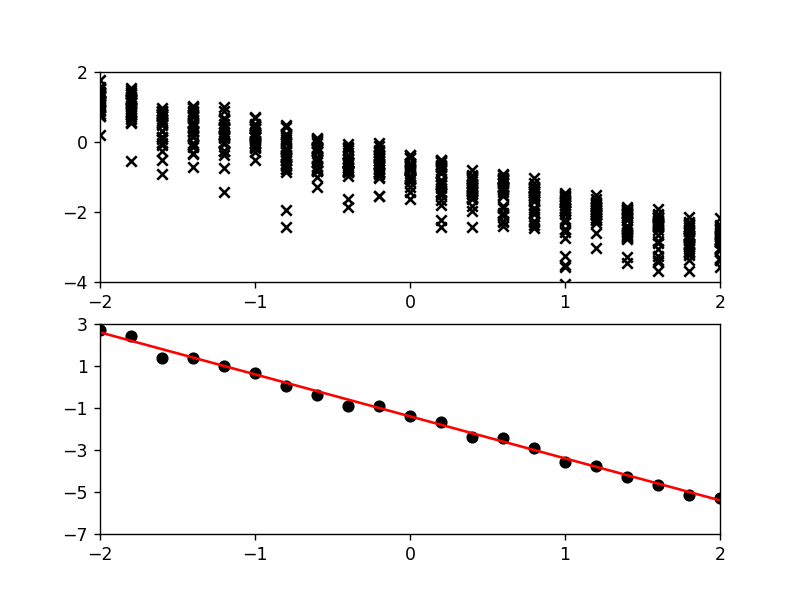

In [22]:
fig = plt.figure() 
ax1 = fig.add_subplot(2, 1, 1)
ax1.set_ylim(-4,2)#10^10的对数
ax1.set_xlim(-2,2)

ax2 = fig.add_subplot(2, 1, 2)
ax2.set_ylim(-7,3)
ax2.set_yticks([-7, -5, -3,-1 ,1,3])
ax2.set_xlim(-2,2)



x1_major_locator=plt.MultipleLocator(1)
y1_major_locator=plt.MultipleLocator(2)
x2_major_locator=plt.MultipleLocator(1)


ax1.xaxis.set_major_locator(x1_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)

ax2.xaxis.set_major_locator(x2_major_locator)


In [11]:
conver_point_var=[]
conver_point_set=np.zeros([1,25])
for ε in ε_set:
    conver_point=[]
    k_set=[]
    c=cVector(δ,ε)
    for i in range(25):
        k=0
        θ=I
        while np.max(θ[:,k])-np.min(θ[:,k])>10**-2:
            θ_next=np.zeros([1,50],dtype=np.int)
            b=c*(q**k)
            η=np.random.laplace(0,b , 50)
            θ_next=θ[:,k]-h*np.dot(L,xVector(θ[:,k],η).reshape(50,1)).T+s*η
            θ_next=np.array(θ_next)
            θ=np.append(θ,θ_next.reshape(50,1),axis=1)
            k=k+1
        k_set.append(k)
        conver_point.append(np.mean(θ[:,-1]))
    conver_point_set=np.append(conver_point_set,np.array([conver_point]),axis=0)
    conver_point_var.append(np.var(np.array(conver_point)))

In [12]:
conver_point_var=np.array(conver_point_var)

In [13]:
conver_point_set

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [70.68271785, 55.73530184, 83.22970452, 58.35012586, 56.41047504,
        -7.83323372, 30.24436119, 34.95273704, 73.02464221, 86.13793366,
        36.15886077, 27.45198128, 59.98084603, 65.14286345, 48.73817958,
        75.98968322, 35.0003714 , 44.64694177, 76.88434548, 39.37257993,
        23.7652514 , 62.5259097 , 12.84927498, 74.82513541, 42.43487964],
       [34.66969136, 63.61918613, 53.67636438, 53.96933824, 26.36204141,
        19.80265906, 33.00821172, 26.81158962, 66.26103263, 50.58689039,
        67.62963621, 31.56391297, 57.27319081, 55.53733248, 56.37273826,
        15.63651528, 63.90511965, 77.14333161, 59

In [14]:
conver_point_set.shape#index=0时全为0，需要跳过

(22, 25)

In [15]:
np.mean(I)

50.29793830134441

In [23]:
def figureA():
    x1=np.linspace(-2,2,21,dtype=np.float)
    for i in range(25):
        y1=np.log10(abs(conver_point_set[np.round((x1+2)/0.2).astype(int)+1,i]-np.mean(I)))
        ax1.scatter(x1,y1,c="k",marker="x")
def figureB():
    x2=np.linspace(-2,2,21,dtype=np.float)
    y2=np.log10(conver_point_var[np.round((x2+2)/0.2).astype(int)])
    y3=np.log10(corollary_55(50,s,cVector(δ,10**x2),q))
    ax2.scatter(x2,y2,c="k",marker="o")
    ax2.plot(x2,y3,c="r")

In [24]:
figureA()

In [25]:
figureB()

np.round((np.linspace(-2,2,21,dtype=np.float)+2)/0.2).astype(int)
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])